In [91]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\Rober\\Downloads\\Database SQL\\Cotizaciones_historicas_SP_500.csv")

df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Company,timestamp,id,Adj Close
0,2000-01-03 00:00:00-05:00,20.168121,20.259973,19.748225,19.813833,2599386.0,0.0,0.0,MMM,3M,2024-10-31 00:33:30,95395fe9-18dc-48a0-b6e8-26bd98c9890c,NaN
1,2000-01-04 00:00:00-05:00,19.498910,19.905685,19.026529,19.026529,3245705.0,0.0,0.0,MMM,3M,2024-10-31 00:33:30,de2f669a-ca8d-4bb6-ad69-ef93bfa287c6,NaN
2,2000-01-05 00:00:00-05:00,19.131507,20.207488,19.131507,19.577646,4424482.0,0.0,0.0,MMM,3M,2024-10-31 00:33:30,fdd7e4f3-23a2-4bdf-9c5c-9c38bb8f733e,NaN
3,2000-01-06 00:00:00-05:00,19.800715,21.519663,19.800715,21.152254,7147057.0,0.0,0.0,MMM,3M,2024-10-31 00:33:30,e1497e88-87da-4811-bb11-b1b195efcc83,NaN
4,2000-01-07 00:00:00-05:00,21.230982,21.795218,20.981670,21.572147,4905035.0,0.0,0.0,MMM,3M,2024-10-31 00:33:30,7526b720-764d-4907-9138-80a88bf3e84e,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756954,2024-10-24 00:00:00-04:00,187.559998,188.250000,180.059998,181.500000,4485900.0,0.0,0.0,ZTS,Zoetis,2024-10-31 00:33:30,bbad2bbe-5839-4555-8069-2a641f44e5e8,NaN
2756955,2024-10-25 00:00:00-04:00,181.490005,182.029999,179.669998,180.009995,2622900.0,0.0,0.0,ZTS,Zoetis,2024-10-31 00:33:30,f6a801bf-1170-4fca-85a8-c197b8c4bb9e,NaN
2756956,2024-10-28 00:00:00-04:00,181.529999,183.100006,180.699997,182.759995,1909700.0,0.0,0.0,ZTS,Zoetis,2024-10-31 00:33:30,52285b90-b2ae-42aa-8690-730ebd6ab3ee,NaN
2756957,2024-10-29 00:00:00-04:00,182.009995,184.410004,181.039993,181.270004,1696000.0,0.0,0.0,ZTS,Zoetis,2024-10-31 00:33:30,55247e7c-99ba-4763-b984-eaa6006f2f3a,NaN


In [44]:
Symbol = "ZTS"
fecha_inicio = '2020-01-01'
fecha_fin ='2021-01-01'

df_empresa = df[df['Symbol'] == Symbol]

df_empresa_periodo = df[(df['Symbol'] == Symbol) &
                        (df['timestamp'] >= fecha_inicio) &
                        (df['timestamp'] <= fecha_fin)]

df_empresa_periodo = df_empresa.sort_values(by='timestamp')

#Calcular rendimiento diario#
df_empresa_periodo['rendimiento'] = df_empresa_periodo['Close'].pct_change()

#Calcular volatilidad diaria (desviacion estandar de los rendimientos diarios)#
volatilidad_diaria = df_empresa_periodo['rendimiento'].std()

#Calcular volatilidad mensual
df_empresa_periodo['mes'] = df_empresa_periodo['timestamp'].dt.to_period('M')
volatilidad_mensual = df_empresa_periodo.groupby('mes')['rendimiento'].std().mean()

print(f"Volatilidad diaria: {volatilidad_diaria}")
print(f"Volatilidad mensual promedio: {volatilidad_mensual}")

Volatilidad diaria: 0.11640150102789469
Volatilidad mensual promedio: 0.11640150102789475


### Ratio de Sharpe ###

In [54]:
def sharpe_ratio(retorno, tasa_libre_riesgo = 0):
    #Calcular el retorno promedio y la desviación estándar de los retornos
    excess_returns = retorno - tasa_libre_riesgo
    retorno_promedio = np.mean(excess_returns)
    desviacion_std_retornos = np.std(retorno)
    
    # Calcular el ratio de Sharpe
    sharpe = retorno_promedio / desviacion_std_retornos
    return sharpe

### Ratio de Sortino

In [46]:
def sortino_ratio(returns, free_risk_rate=0, rendimiento_min_aceptable=0):
    # Calcular el exceso de retorno sobre el MAR
    exceso_retorno = returns - rendimiento_min_aceptable
    desv_std_retornos = exceso_retorno[exceso_retorno < 0]
    
    # Calcular el retorno promedio en exceso y la desviación estándar solo de los retornos negativos
    retorno = np.mean(exceso_retorno)
    desv_std_retornos = np.std(desv_std_retornos)
    
    # Calcular el ratio de Sortino
    sortino = retorno / desv_std_retornos
    return sortino

In [55]:
print(f"volatilidad_diaria: {volatilidad_diaria}")
sharpe = sharpe_ratio(df_empresa_periodo['rendimiento'], tasa_libre_riesgo = 0)
sortino = sortino_ratio(df_empresa_periodo['rendimiento'], rendimiento_min_aceptable = 0)

print(f"Ratio de Sharpe diario: {sharpe}")
print(f"Ratio de Sortino diario: {sortino}")

volatilidad_diaria: 0.11640150102789469
Ratio de Sharpe diario: 0.03221995486627839
Ratio de Sortino diario: 0.0841743661390912


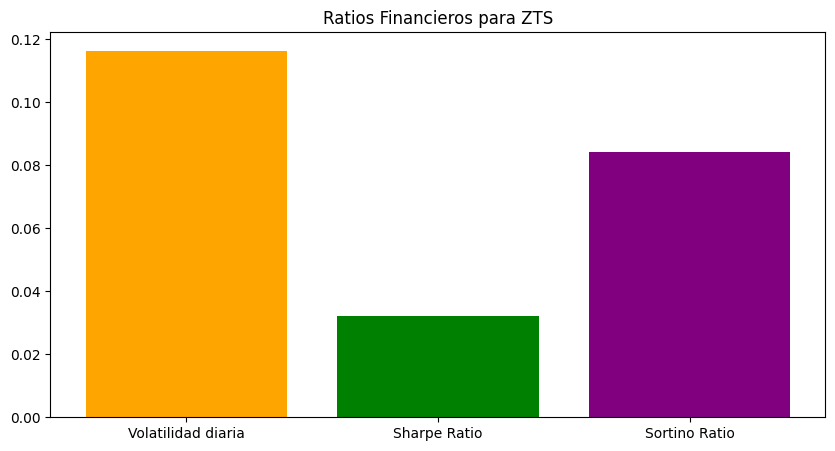

In [56]:
# Graficar la volatilidad y los ratios
plt.figure(figsize=(10, 5))
plt.bar(['Volatilidad diaria', 'Sharpe Ratio', 'Sortino Ratio'], 
        [volatilidad_diaria, sharpe, sortino], color=['orange', 'green', 'purple'])
plt.title(f'Ratios Financieros para {Symbol}')
plt.show()

In [87]:
# Filtrar por un mes específico, por ejemplo, enero de 2020
mes_deseado = '2024-01'
df_mes = df_empresa_periodo[df_empresa_periodo['timestamp'].dt.strftime('%Y-%m') == mes_deseado]

In [89]:
# Calcular Sharpe Ratio diario para el mes seleccionado
tasa_libre_riesgo_diaria = 0.01 / 252  # Si la tasa anual es del 1%
df_mes['sharpe_diario'] = (df_mes['rendimiento'].rolling(window=1).mean() - tasa_libre_riesgo_diaria) / df_mes['rendimiento'].rolling(window=1).std()

# Calcular Sortino Ratio diario para el mes seleccionado
rendimientos_negativos = df_mes['rendimiento'].apply(lambda x: x if x < 0 else 0)
desviacion_std_negativa = rendimientos_negativos.rolling(window=1).std()
df_mes['sortino_diario'] = (df_mes['rendimiento'].rolling(window=1).mean()) / desviacion_std_negativa

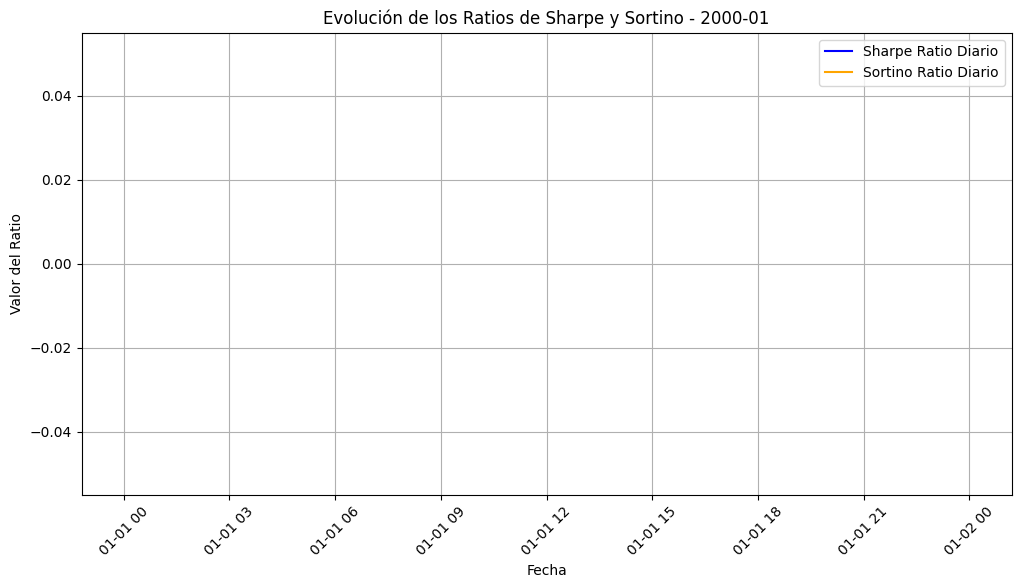

In [82]:
plt.figure(figsize=(12, 6))

# Graficar el Ratio de Sharpe Diario
plt.plot(df_mes['timestamp'], df_mes['sharpe_diario'], label="Sharpe Ratio Diario", color="blue")

# Graficar el Ratio de Sortino Diario
plt.plot(df_mes['timestamp'], df_mes['sortino_diario'], label="Sortino Ratio Diario", color="orange")

# Configurar detalles del gráfico
plt.xlabel("Fecha")
plt.ylabel("Valor del Ratio")
plt.title(f"Evolución de los Ratios de Sharpe y Sortino - {mes_deseado}")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()